# Get data for BASE-9

This notebook tests my codes to grab data from Gaia, Pan-STARRS, and 2MASS, then use Gaia data to estimate membership probabilities, and output a phot file for BASE-9

### Gaia:
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html
- https://gea.esac.esa.int/archive/documentation/GEDR3/index.html

### Pan-STARRS:
- https://gaia.aip.de/metadata/gaiaedr3/panstarrs1_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_panstarrs1_original_valid.html
- https://allendowney.github.io/AstronomicalData/05_join.html

### 2MASS:
- https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries
- https://gaia.aip.de/metadata/gaiaedr3/tmass_psc_xsc_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_crossmatches/ssec_dm_tmass_psc_xsc_join.html
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_tmass_original_valid.html



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as units
%pip install -q astroquery

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext autoreload 
%autoreload 2 
from getGaiaData import GaiaClusterMembers

In [107]:
# Generally, we can pull the central coordinates and size from my OC summary data here : 
# https://github.com/ageller/compileOCs
NGC6819 = GaiaClusterMembers(295.3250, 40.19, .2)
NGC6819.verbose = 1
NGC6819.getData()
NGC6819.data

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,dr2_radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
2076293190685667968,295.34631353210835,39.99164835453615,-2.866797572054911,-4.116419448425422,--,18.397455,659.9698,19.009876,42.40587,17.645021,90.05356,0.34016742319465637,1.0402148,1,0,19.2152996063232,0.0108000002801418,18.3799991607666,0.00822899956256151,18.0445003509521,0.0085230004042387,17.8556003570557,0.00892500020563602,17.7570991516113,0.0162799991667271,16.598,0.133,16.013,--,16.193,--,0.0032090875,0.025755024,0.012635045
2076293190685668352,295.3432901961285,39.992015121089196,-2.157318316170344,-6.396563310585276,--,19.217903,413.61377,19.755083,28.809515,18.520773,56.13323,0.49342618985785625,0.9710014,1,0,19.9293994903564,0.0180350001901388,19.2049999237061,0.0113930003717542,18.9192008972168,0.00527499988675117,18.769100189209,0.0153980003669858,18.7112007141113,0.0337230004370213,--,--,--,--,--,--,0.0038055766,0.037789866,0.019707909
2076293190685668736,295.34737373260475,39.99429058265716,-2.746721425553232,-2.7581094602385634,--,17.869854,955.0183,18.28923,87.64281,17.307098,144.58176,0.12164822397279375,1.0548673,1,0,18.3533000946045,0.00677300011739135,17.8488998413086,0.00594699988141656,17.6601009368896,0.00572799984365702,17.5990009307861,0.00827800016850233,17.5289993286133,0.0121680004522204,16.701,0.13,16.305,0.202,15.618,--,0.00298065,0.01269852,0.008406918
2076293194986548352,295.3441190258753,39.99078312211985,-4.9102833467469145,-3.939137764794691,--,20.600157,139.85168,20.989183,6.6379776,19.744846,15.07469,0.3225998195667843,1.0199031,1,0,21.6860008239746,0.062270000576973,20.6408004760742,0.029084000736475,20.1109008789063,0.041482999920845,19.8157997131348,0.0388959981501102,19.6504993438721,0.0333510003983974,--,--,--,--,--,--,0.008237928,0.16358809,0.07212287
2076293194986553216,295.3436836261727,39.99418917910774,-2.8837842376070726,-3.1026258046930777,--,20.728674,104.75699,21.3322,8.8756,20.262108,11.516844,0.9716632965285792,1.0158293,1,0,21.5447998046875,0.0513710007071495,20.7250995635986,0.0268830005079508,20.4421005249023,0.0634419992566109,20.2872009277344,0.0735270008444786,20.0438995361328,0.0328719988465309,--,--,--,--,--,--,0.010724326,0.12236001,0.09434949
2076293194986553344,295.34662257884474,39.991011914636026,-3.4448111144865274,-3.5507379576285487,--,20.028708,228.90987,21.099047,6.0279408,19.045767,23.43347,0.1858396532592426,1.1440067,1,0,21.5086994171143,0.0790409967303276,20.2588005065918,0.0450709983706474,19.399299621582,0.0046080001629889,19.0643997192383,0.00820299983024597,18.7856998443604,0.0392270013689995,--,--,--,--,--,--,0.005485301,0.18013889,0.046486598
2076293259405144448,295.33148633038405,39.99048531743487,-2.8135341321655067,-4.254260949222743,--,17.579803,1095.7512,17.940256,106.130516,17.017294,149.8217,0.07769419672847519,0.997362,1,0,18.0368003845215,0.00779600022360682,17.5634002685547,0.00379600003361702,17.4004993438721,0.00132899999152869,17.3141994476318,0.00922700017690659,17.2577991485596,0.0105250002816319,16.401,0.105,15.951,0.144,15.337,--,0.0029280698,0.010603867,0.008173166
2076293259405147776,295.3264547152631,39.999562291513435

In [108]:
NGC6819.data.columns

<TableColumns names=('source_id','ra','dec','pmra','pmdec','dr2_radial_velocity','phot_g_mean_mag','phot_g_mean_flux_over_error','phot_bp_mean_mag','phot_bp_mean_flux_over_error','phot_rp_mean_mag','phot_rp_mean_flux_over_error','parallax','ruwe','number_of_neighbours','number_of_mates','g_mean_psf_mag','g_mean_psf_mag_error','r_mean_psf_mag','r_mean_psf_mag_error','i_mean_psf_mag','i_mean_psf_mag_error','z_mean_psf_mag','z_mean_psf_mag_error','y_mean_psf_mag','y_mean_psf_mag_error','j_m','j_msigcom','h_m','h_msigcom','ks_m','ks_msigcom','phot_g_mean_mag_error','phot_bp_mean_mag_error','phot_rp_mean_mag_error')>

(-2.0, 4.0)

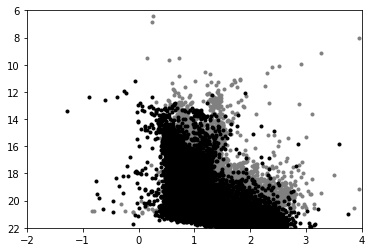

In [109]:
f, ax = plt.subplots()
ax.plot(NGC6819.data['phot_bp_mean_mag'] - NGC6819.data['phot_rp_mean_mag'], NGC6819.data['phot_g_mean_mag'],'.', color='gray')
ax.plot(NGC6819.data['g_mean_psf_mag'] - NGC6819.data['i_mean_psf_mag'], NGC6819.data['g_mean_psf_mag'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [110]:
NGC6819.plotNameRoot = 'plots/'
NGC6819.verbose = 0

Finding radial-velocity members ... 


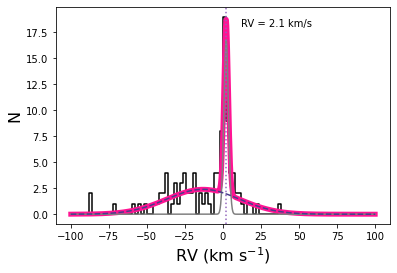

In [119]:
NGC6819.RVmean = 2.1
NGC6819.RVfitParameters = (18,2.4,.5, 1,1,2)
NGC6819.getRVMembers()

Finding parallax members ... 


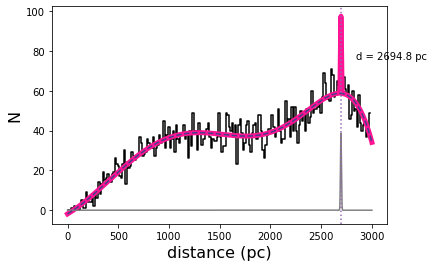

In [120]:
#NGC6819.distance = 2660.53 #pc
NGC6819.getParallaxMembers()

finding proper-motion members ...


c:\Users\Claire\Documents\Code\BASE9_utils_fork\getGaiaData\getGaiaData.py:346: UserWarning: Log scale: values of z <= 0 have been masked
  ax2.set_xlim(self.PMxmin, self.PMxmax)
c:\Users\Claire\Documents\Code\BASE9_utils_fork\getGaiaData\getGaiaData.py:346: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.set_xlim(self.PMxmin, self.PMxmax)


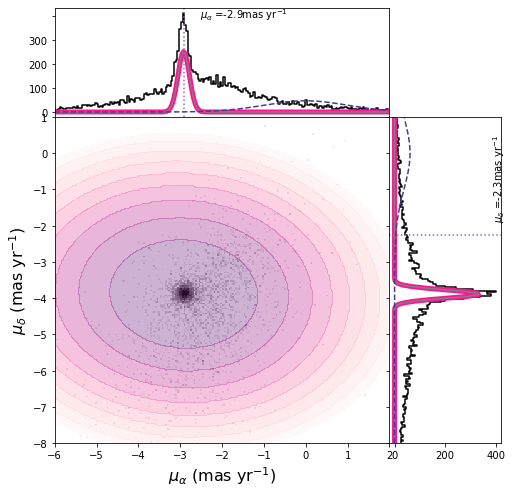

In [121]:
# this is very hard to fit for NGC 188!
NGC6819.PMmean = [-3,-4]
NGC6819.PMxmin = -6
NGC6819.PMxmax =2
NGC6819.PMymin = -8
NGC6819.PMymax = 1
NGC6819.PMxbins = 200
NGC6819.PMybins = 200
NGC6819.verbose = 1
NGC6819.getPMMembers()

In [114]:
NGC6819.data

source_id,ra,dec,pmra,pmdec,dr2_radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,PRV,PPa,PPM
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
2076293190685667968,295.34631353210835,39.99164835453615,-2.866797572054911,-4.116419448425422,--,18.397455,659.9698,19.009876,42.40587,17.645021,90.05356,0.34016742319465637,1.0402148,1,0,19.2152996063232,0.0108000002801418,18.3799991607666,0.00822899956256151,18.0445003509521,0.0085230004042387,17.8556003570557,0.00892500020563602,17.7570991516113,0.0162799991667271,16.598,0.133,16.013,--,16.193,--,0.0032090875,0.025755024,0.012635045,--,0.0,1.0
2076293190685668352,295.3432901961285,39.992015121089196,-2.157318316170344,-6.396563310585276,--,19.217903,413.61377,19.755083,28.809515,18.520773,56.13323,0.49342618985785625,0.9710014,1,0,19.9293994903564,0.0180350001901388,19.2049999237061,0.0113930003717542,18.9192008972168,0.00527499988675117,18.769100189209,0.0153980003669858,18.7112007141113,0.0337230004370213,--,--,--,--,--,--,0.0038055766,0.037789866,0.019707909,--,0.0,1.0
2076293190685668736,295.34737373260475,39.99429058265716,-2.746721425553232,-2.7581094602385634,--,17.869854,955.0183,18.28923,87.64281,17.307098,144.58176,0.12164822397279375,1.0548673,1,0,18.3533000946045,0.00677300011739135,17.8488998413086,0.00594699988141656,17.6601009368896,0.00572799984365702,17.5990009307861,0.00827800016850233,17.5289993286133,0.0121680004522204,16.701,0.13,16.305,0.202,15.618,--,0.00298065,0.01269852,0.008406918,--,-0.0,1.0
2076293194986548352,295.3441190258753,39.99078312211985,-4.9102833467469145,-3.939137764794691,--,20.600157,139.85168,20.989183,6.6379776,19.744846,15.07469,0.3225998195667843,1.0199031,1,0,21.6860008239746,0.062270000576973,20.6408004760742,0.029084000736475,20.1109008789063,0.041482999920845,19.8157997131348,0.0388959981501102,19.6504993438721,0.0333510003983974,--,--,--,--,--,--,0.008237928,0.16358809,0.07212287,--,0.0,1.0
2076293194986553216,295.3436836261727,39.99418917910774,-2.8837842376070726,-3.1026258046930777,--,20.728674,104.75699,21.3322,8.8756,20.262108,11.516844,0.9716632965285792,1.0158293,1,0,21.5447998046875,0.0513710007071495,20.7250995635986,0.0268830005079508,20.4421005249023,0.0634419992566109,20.2872009277344,0.0735270008444786,20.0438995361328,0.0328719988465309,--,--,--,--,--,--,0.010724326,0.12236001,0.09434949,--,0.0,1.0
2076293194986553344,295.34662257884474,39.991011914636026,-3.4448111144865274,-3.5507379576285487,--,20.028708,228.90987,21.099047,6.0279408,19.045767,23.43347,0.1858396532592426,1.1440067,1,0,21.5086994171143,0.0790409967303276,20.2588005065918,0.0450709983706474,19.399299621582,0.0046080001629889,19.0643997192383,0.00820299983024597,18.7856998443604,0.0392270013689995,--,--,--,--,--,--,0.005485301,0.18013889,0.046486598,--,-0.0,1.0
2076293259405144448,295.33148633038405,39.99048531743487,-2.8135341321655067,-4.254260949222743,--,17.579803,1095.7512,17.940256,106.130516,17.017294,149.8217,0.07769419672847519,0.997362,1,0,18.0368003845215,0.00779600022360682,17.5634002685547,0.00379600003361702,17.4004993438721,0.00132899999152869,17.3141994476318,0.00922700017690659,17.2577991485596,0.0105250002816319,16.401,0.105,15.951,0.

In [122]:
NGC6819.combineMemberships()

combining memberships ...


plotting CMD ...
plotting CMD ...


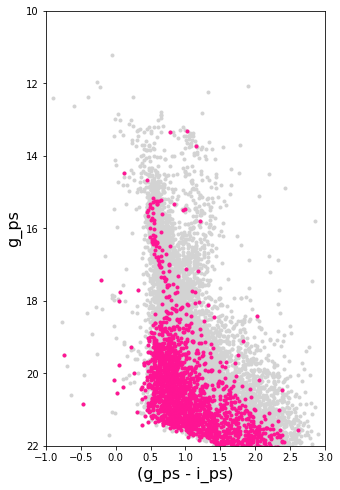

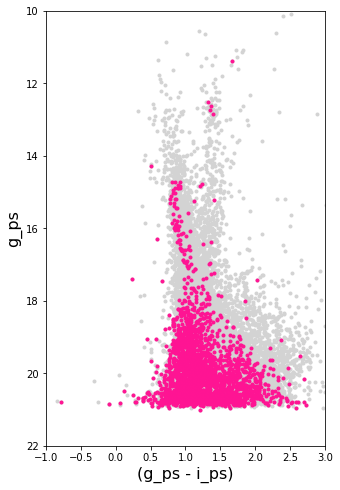

In [123]:
NGC6819.membershipMin = 0.01
NGC6819.plotCMD()
NGC6819.plotCMD(x1='phot_bp_mean_mag', x2='phot_rp_mean_mag', y= 'phot_g_mean_mag')

In [104]:
# output a .phot file for BASE-9
# I may want to rename the .py file.  When finished, upload to Drive
# double check with proposal that this is the only photometry we proposed to use
NGC6819.photOutputFileName = 'NGC6819.phot'
NGC6819.generatePhotFile()

generating phot file ...


(-2.0, 4.0)

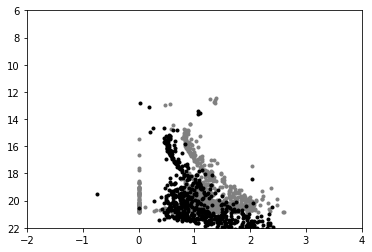

In [105]:
df = pd.read_csv(NGC6819.photOutputFileName, delimiter=' ')
f, ax = plt.subplots()
ax.plot(df['G_BPft'] - df['G_RP'], df['G'],'.', color='gray')
ax.plot(df['g_ps'] - df['i_ps'], df['g_ps'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [106]:
# output a base9.yaml file for BASE-9?
NGC6819.yamlOutputFileName = 'inputs/base9.yaml'
NGC6819.yamlTemplateFileName = 'template_base9.yaml'
NGC6819.yamlInputDict = {
    'photFile' : 'ngc188.phot',
    'outputFileBase' : 'output/ngc188',
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [0., 0., 0.3],
    'Av' : [0., 0., 0.3],
    'Y' : [0.29, 0.29, 0.0],
    'carbonicity' : [0.38, 0.38, 0.0],
    'logAge' : [10.4, 10.4, np.inf],
    'distMod' : [12.3, 12.3, 1.],
}

NGC6819.generateYamlFile()

generating yaml file ...


## Testing as pipeline

(Though it will require some tweaking for clusters to define, e.g., distance, PM, etc.)

In [36]:
# read in my OC file and see if I can use that to define the input values
# https://github.com/ageller/compileOCs/blob/master/OCcompiled_clean.csv
clusterName = 'NGC_6819'

OCdf = pd.read_csv('OCcompiled_clean_v2.csv')
row = OCdf.loc[OCdf['ID'] == clusterName].iloc[0]

# get the cluster center
center = SkyCoord(row['RA[hr]'], row['Dec[deg]'], unit=(units.hourangle, units.degree))
center.ra.to(units.degree).value

#calculate the distance modulus and error
dmod = 5.*np.log10(row['dist[pc]']) - 5.
err_dmod = (5.*1./np.log(10.)*(1./row['dist[pc]']))*row['err_dist[pc]'] # error propagation

# estimate the cluster tidal radius 
# equation from Binney and Tremaine for Jacoby Radius (8.91)
# at least for NGC 188, this seems a bit small...
# I'm adding a factor of 2 in front

# want this in degrees
Mg = 1.0*10**12 #*units.solMass #this probably could use verification and a reference
rt = row['rgc[pc]']*(row['mass[Msun]']/(3.*Mg))**(1./3.)
rtfac = 5.
radius = rtfac*np.arctan2(rt, row['dist[pc]'])*180./np.pi
print(radius, rt, dmod, err_dmod)
                  
# Note: many clusters won't have Av (and other values)
# for Av, I can get a value from a model, or just use 0

0.7247791687195356 6.004232237311381 11.876717447727362 0.04364351832397066


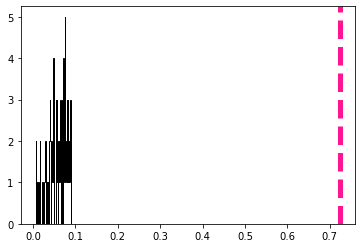

In [37]:
# quick check on the calculated tidal radius
f, ax = plt.subplots()
_ = ax.hist(NGC6819.members['rCenter'].data, histtype='step', color='black', bins = 100)
ax.axvline(radius, ls='dashed', lw=5, color='deeppink')

In [38]:
row

ID                      NGC_6819
RA[hr]              19 41 18.480
Dec[deg]            40 11 24.000
ID_Simbad               NGC_6819
ID_MWSC                 NGC_6819
ID_WEBDA                NGC_6819
ID_Piskunov                  NaN
ID_Kharchenko           NGC_6819
ID_Salaris              NGC_6819
ID_vandenBergh          NGC_6819
ID_Cantat-Gaudin        NGC_6819
ID_Lynga                NGC_6819
dist[pc]                 2373.25
err_dist[pc]           47.698962
N_dist[pc]                   6.0
age[Myr]              1926.03254
err_age[Myr]          536.781437
N_age[Myr]                   5.0
[Fe/H]                      0.05
err_[Fe/H]              0.096954
N_[Fe/H]                     1.0
mass[Msun]               1221.75
err_mass[Msun]        785.718551
N_mass[Msun]                 4.0
rgc[pc]                  8100.35
err_rgc[pc]            56.321055
N_rgc[pc]                    2.0
rhm[pc]                  2.37255
err_rhm[pc]             0.644297
N_rhm[pc]                    1.0
Av[mag]   

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]
Finding radial-velocity members ... 
Finding parallax members ... 


finding proper-motion members ...


c:\Users\Claire\Documents\Code\BASE9_utils_fork\getGaiaData\getGaiaData.py:340: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], pmG2D(xf, yf).T, cmap=cm.RdPu, bins = 20, \


combining memberships ...
plotting CMD ...
generating phot file ...
generating yaml file ...
done.


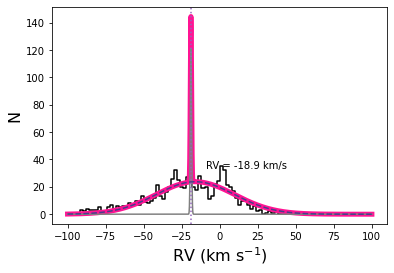

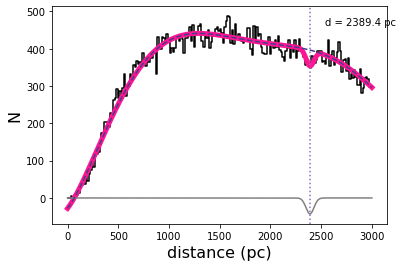

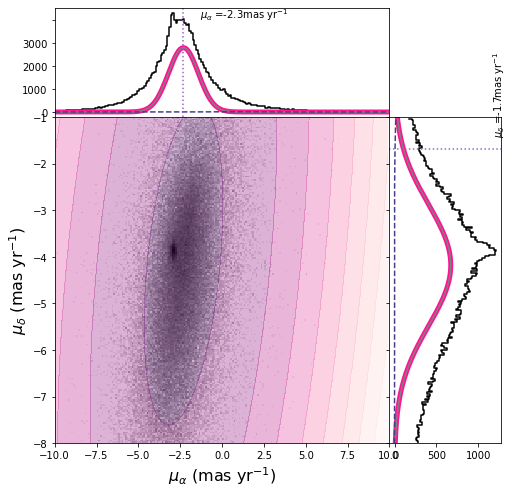

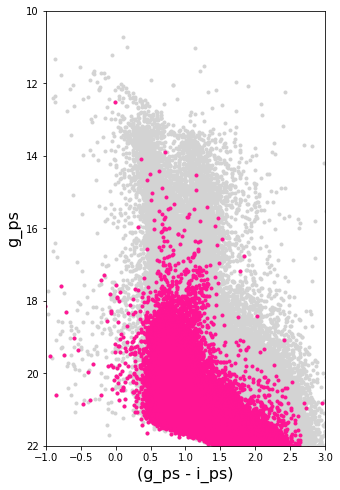

In [40]:
# I should test with reading in from my compiled OC list
cluster = GaiaClusterMembers(center.ra.to(units.degree).value, center.dec.to(units.degree).value, radius)
cluster.plotNameRoot = 'plots/'
cluster.distance = row['dist[pc]'] #pc
########
# this is not in my table.  I may want to work on making the code more robust so this is not needed
cluster.PMxmin = -10
cluster.PMxmax = 10
cluster.PMymin = -8
cluster.PMymax =-1
#cluster.PMmean = [-2.5, -1]
cluster.PMxbins = 200
cluster.PMybins = 200
########
cluster.membershipMin = 0.01
cluster.verbose = 1
cluster.photOutputFileName = 'inputs/' + clusterName + '.phot'
cluster.yamlOutputFileName = 'inputs/base9.yaml'
cluster.yamlTemplateFileName = 'template_base9.yaml'
cluster.yamlInputDict = {
    'photFile' : 'inputs/' + clusterName + '.phot',
    'outputFileBase' : 'output/' + clusterName,
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [row['[Fe/H]'], row['[Fe/H]'], row['err_[Fe/H]']],
    'Av' : [row['Av[mag]'], row['Av[mag]'], row['err_Av[mag]']],
    'Y' : [0.29, 0.29, 0.0], # keep the defaults
    'carbonicity' : [0.38, 0.38, 0.0], # keep the defaults
    'logAge' : [np.log10(row['age[Myr]']*10**6), np.log10(row['age[Myr]']*10**6), np.inf],
    'distMod' : [dmod, dmod, err_dmod],
}
cluster.runAll()

## Try reading in the existing phot file and outputting a sampled version

for time testing

In [ ]:
from astropy.io import ascii
import numpy as np

In [ ]:
gen = GaiaClusterMembers()
data = ascii.read('inputs/NGC_188.phot')
data

id,G,G_BPft,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,H_2M,Ks_2M,sigG,sigG_BPft,sigG_RP,sigg_ps,sigr_ps,sigi_ps,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,mass1,massRatio,stage1,CMprior,useDBI
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,int32
110520001,10.0564,11.1854,9.0079,11.522,10.6138,9.671,9.0908,9.0991,7.466,6.599,6.4,0.01,0.01,0.01,0.0737,0.047,0.0595,0.0767,0.0725,0.026,0.033,0.026,0.0,0.0,1,0.203,1
104710002,10.7909,11.6393,9.8907,99.9,99.9,99.9,99.9,99.9,8.58,7.892,7.652,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.026,0.038,0.023,0.0,0.0,1,0.272,1
110470003,11.0748,11.9459,10.1629,99.9,99.9,99.9,99.9,99.9,8.889,8.098,7.909,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.053,0.02,0.0,0.0,1,0.277,1
106630004,11.1288,11.8191,10.3309,99.9,99.9,99.9,99.9,99.9,9.292,8.597,8.441,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.029,0.042,0.023,0.0,0.0,1,0.192,1
100250005,11.6651,12.2491,10.9395,99.9,99.9,99.9,99.9,99.9,9.966,9.398,9.26,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.029,0.021,0.0,0.0,1,0.179,1
101610006,11.9237,12.5855,11.1456,99.9,99.9,99.9,99.9,99.9,10.098,9.461,9.304,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.03,0.019,0.0,0.0,1,0.118,1
108930007,11.993,12.5921,11.2606,99.9,99.9,99.9,99.9,99.9,10.252,9.768,9.62,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.034,0.02,0.0,0.0,1,0.272,1
100540008,12.0495,12.6406,11.3226,99.9,99.9,99.9,99.9,99.9,10.349,9.789,9.639,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.031,0.021,0.0,0.0,1,0.225,1
109210009,12.0802,12.6695,11.3557,99.9,99.9,99.9,99.9,99.9,10.403,9.837,9.702,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.031,0.021,0.0,0.0,1,0.24,1


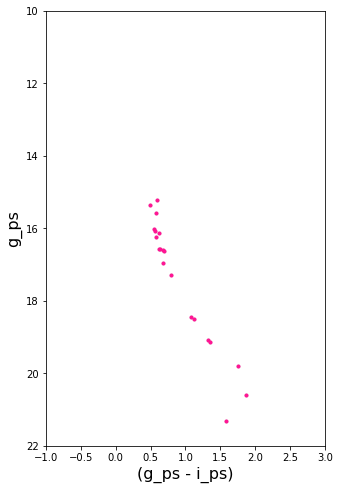

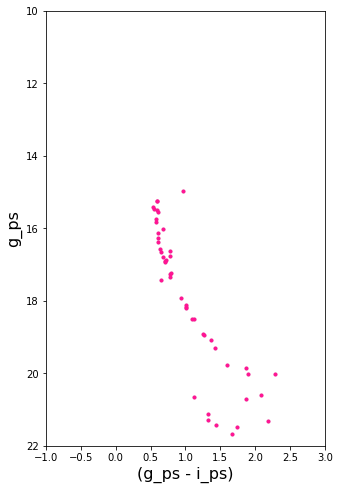

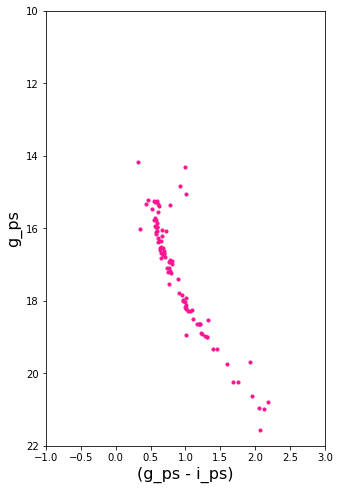

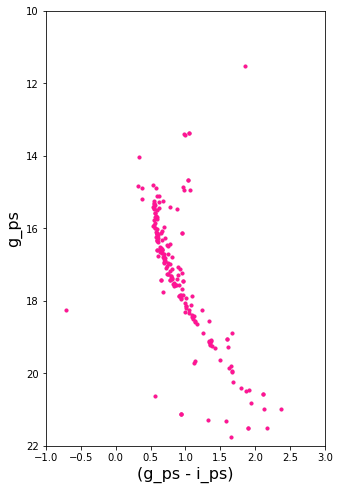

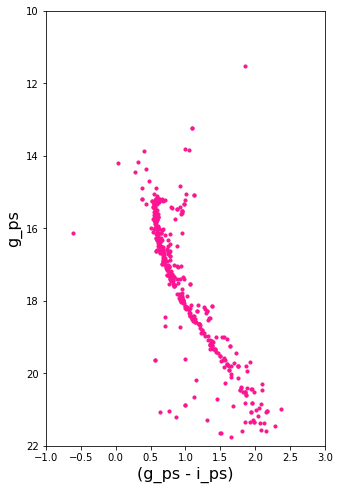

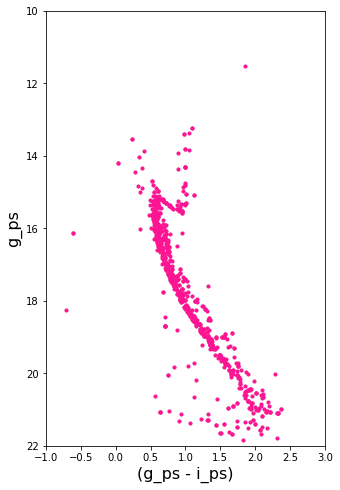

In [ ]:
sizes = [20, 50, 100, 200, 500, 1000]
for s in sizes:
    indices = np.random.choice(np.arange(0,len(data)), size=s)
    foo = data[indices]
    gen.plotCMD(data=foo, x1='g_ps', x2='i_ps', y='g_ps', m='CMprior', savefig=False)
    gen.dumpPhotFile(foo, filename='inputs/NGC6819_'+str(s)+'.phot')